# CAPSTONE PROJECT - Product Rating Fashion Site

## 1. Connect Colab to Google Drive

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_data = 'gdrive/MyDrive/DS+BI/Data with Narasio/Capstone/Project/'

## 2. Import Packages

In [4]:
#Import Packgaes
import os
import pandas as pd
from datetime import datetime as dt
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as md
import matplotlib.pyplot as plt
import sqlite3

## 3. Connect SQLite to Python

In [5]:
# Create connection to database
conn = sqlite3.connect(path_data + "product_fashion_ratings.db")

# Set sql server cursor
cur = conn.cursor()

In [6]:
# Cek table yang berada di database
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('products',), ('brand_details',), ('main_categories',), ('sub_categories',), ('item_details',), ('events',)]


## 4. Data Preparation Using SQL

In [7]:
# Check column and value in table producst
pd.read_sql_query("SELECT * FROM products", conn)

,index,product_ID,product_name
0,0,1,Chapeau à Visière Anti-UV pour Protection Solaire
1,1,2,Écharpe longue 180cm à pois en broderie pour f...
2,2,3,Casquette de baseball de sport en plein air de...
3,3,4,Casquettes de Baseball Respirantes Unisexe Par...
4,4,5,LYZA Femmes Châle Surdimensionné Réversible Po...
...,...,...,...
13308,13308,13309,Sarouel décontracté à taille élastique
13309,13309,13310,Blouses à demi-manches à imprimé asymétrique
13310,13310,13311,Robe deux pièces décontractée
13311,13311,13312,Oreilles à capuche Cartoon Hoodie


In [8]:
# Check column and value in table brand details
pd.read_sql_query("SELECT * FROM brand_details", conn)

,index,brand_ID,brand_name,brand_url
0,0,1,Socofy-1,None
1,1,2,MEANBEAUTY,https://fr.newchic.com/meanbeauty-brand-1436.html
2,2,3,NUZADA,https://fr.newchic.com/nuzada-brand-1434.html
3,3,4,LYZA,https://fr.newchic.com/lyza-brand-1148.html
4,4,5,duni,https://fr.newchic.com/duni-brand-1396.html
...,...,...,...,...
414,414,415,BIMEI,https://fr.newchic.com/bimei-brand-1721.html
415,415,416,Veri Gude,https://fr.newchic.com/veri-gude-brand-1216.html
416,416,417,MC CLAYN,https://fr.newchic.com/mc-clayn-brand-1147.html
417,417,418,DAISSIONI,https://fr.newchic.com/daissioni-brand-1128.html


In [9]:
# Create and check column and value in table main categories
pd.read_sql_query("SELECT * FROM main_categories", conn)

,index,category_ID,category_name
0,0,1,accessories
1,1,2,bags
2,2,3,beauty
3,3,4,house
4,4,5,jewelry
5,5,6,kids
6,6,7,men
7,7,8,shoes
8,8,9,women


In [10]:
# Create and check column and value in table sub categories
pd.read_sql_query("SELECT * FROM sub_categories ", conn)

,index,subcategory_ID,subcategory_name
0,0,1,Écriture & Peinture
1,1,2,Épilateur
2,2,3,Éponges
3,3,4,Étui & Étagère
4,4,5,Étui & Sac des monnaies
...,...,...,...
446,446,447,Wine Decanters
447,447,448,Wine Glasses
448,448,449,Wine Racks
449,449,450,Wine Stoppers


In [11]:
# Create and check column and value in table item details
pd.read_sql_query("SELECT * FROM item_details", conn)


,index,item_ID,product_ID,variation_0_color,variation_1_color
0,0,1,1,Bleu ciel,Gris
1,1,2,2,armée verte,Bleu
2,2,3,3,#1,#2
3,3,4,4,rouge,Bleu
4,4,5,5,Rose,Bleu
...,...,...,...,...,...
13984,13984,13985,13309,armée verte,kaki
13985,13985,13986,13310,Noir,blanc
13986,13986,13987,13311,Green,Yellow
13987,13987,13988,13312,Pink,Navy


In [12]:
pd.read_sql_query("""
                  SELECT
                  *
                  FROM events """, conn)

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48 USD,42.0,285,0,"ID,MY,PH,SG,TH,VN"
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99 USD,65.0,147,0,"ID,MY,PH,SG,TH,VN"
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59 USD,58.0,1,0,"ID,MY,PH,SG,TH,VN"
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03 USD,43.0,500,0,"ID,MY,PH,SG,TH,VN"
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99 USD,0.0,251,0,"ID,MY,PH,SG,TH,VN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99 USD,55.0,2,1,"ID,MY,PH,SG,TH,VN"
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99 USD,53.0,2,1,"ID,MY,PH,SG,TH,VN"
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99 USD,50.0,1,1,"ID,MY,PH,SG,TH,VN"
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99 USD,50.0,2,1,"ID,MY,PH,SG,TH,VN"


In [13]:
# Create and check column and value in table events
df_events = pd.read_sql_query("""
                  SELECT
                  item_ID,
                  `perc.discount`
                  FROM events """, conn)

In [14]:
# Join table
df_selected = pd.read_sql_query(
    """SELECT
          e.ID,
          d.item_ID,
          p.product_name,
          b.brand_name,
          d.variation_0_color,
          d.variation_1_color,
          m.category_name,
          s.subcategory_name, 
          e.current_price,
          e.likes_count,
          e.is_new,
          e.codCountry
        
        FROM events e

        INNER JOIN products p
          ON e.product_ID = p.product_ID
        INNER JOIN brand_details b
          ON e.brand_ID = b.brand_ID
        INNER JOIN main_categories m
          ON e.category_ID = m.category_ID
        INNER JOIN sub_categories s
          ON e.subcategory_ID = s.subcategory_ID
        INNER JOIN item_details d
          ON e.item_ID = d.item_ID

      """, conn)
df_selected

,ID,item_ID,product_name,brand_name,variation_0_color,variation_1_color,category_name,subcategory_name,current_price,likes_count,is_new,codCountry
0,27788,4677,Mesure verticale horizontale de laser de nivea...,Loskii,None,None,house,ART MURAL,21.48 USD,285,0,"ID,MY,PH,SG,TH,VN"
1,42560,10372,Chemises élégantes de dentelle de patchwork,ZANZEA,Noir,blanc,women,Chemises,22.99 USD,147,0,"ID,MY,PH,SG,TH,VN"
2,45211,3658,Filtre à essence liquide universel pour essenc...,BEON,None,None,house,Lumières,1.59 USD,1,0,"ID,MY,PH,SG,TH,VN"
3,48169,1168,Rouleau de peau YFM pour les rides cicatrices ...,Y.F.M,None,None,beauty,Accessoires soin visage,19.03 USD,500,0,"ID,MY,PH,SG,TH,VN"
4,51841,9761,Sweat à capuche à manches longues à manches lo...,ZANZEA,Noir,None,women,T-Shirts,21.99 USD,251,0,"ID,MY,PH,SG,TH,VN"
...,...,...,...,...,...,...,...,...,...,...,...,...
14156,1723915,9143,Pantoufles d'intérieur à boucle en métal de co...,Socofy,Pink,Green,shoes,Claquettes & Tongs,29.99 USD,2,1,"ID,MY,PH,SG,TH,VN"
14157,1723920,9154,Pantoufles de chaussures à rayures colorées,Socofy,Pink,Blue,shoes,Claquettes & Tongs,32.99 USD,2,1,"ID,MY,PH,SG,TH,VN"
14158,1723924,9155,Pantoufles de chaussures à rayures de couleur ...,Socofy,Green,Dark Blue,shoes,Claquettes & Tongs,32.99 USD,1,1,"ID,MY,PH,SG,TH,VN"
14159,1723927,9117,Chaussures plates larges brodées de fleurs,Lostisy,gris,None,shoes,Derbies & Mocassins,29.99 USD,2,1,"ID,MY,PH,SG,TH,VN"


## This the reason why the three tables above are initialized:
  - There is a column containing a dot (.), which is the perc.discount column in table events. It difficult for the joining process with subqueries.
  -  The way looks difficult and repetitive, but I have no idea and haven't found an answer to change it while using the query. So in other words, I'm going to merge df_selected with df_events with its unique in both tables i.e. item_ID

## 5. Problem Statement

Newchic is a company from Hong Kong which is engaged in the retail apparel and fashion industry.

Since 2016, the company has a website, NewChic.com, which provides a variety of products from brands. Women's fashion, men's fashion, accessories, to homes and gardens can be found on the site.

In the given dataset, the codCountry column explains that the scale shown from the data comes from Southeast Asia. So here's the problem statement:



1.   What is the correlation between the columns containing numeric values?
2.   What products are most liked on Newchic site in southeast asia region?
3.   Find the highest price in each category of the brand on the website

## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

### Merging 

In [15]:
df_selected = df_selected.merge(df_events, how='left', on='item_ID')
df_selected

,ID,item_ID,product_name,brand_name,variation_0_color,variation_1_color,category_name,subcategory_name,current_price,likes_count,is_new,codCountry,perc.discount
0,27788,4677,Mesure verticale horizontale de laser de nivea...,Loskii,None,None,house,ART MURAL,21.48 USD,285,0,"ID,MY,PH,SG,TH,VN",42.0
1,42560,10372,Chemises élégantes de dentelle de patchwork,ZANZEA,Noir,blanc,women,Chemises,22.99 USD,147,0,"ID,MY,PH,SG,TH,VN",65.0
2,45211,3658,Filtre à essence liquide universel pour essenc...,BEON,None,None,house,Lumières,1.59 USD,1,0,"ID,MY,PH,SG,TH,VN",58.0
3,48169,1168,Rouleau de peau YFM pour les rides cicatrices ...,Y.F.M,None,None,beauty,Accessoires soin visage,19.03 USD,500,0,"ID,MY,PH,SG,TH,VN",43.0
4,51841,9761,Sweat à capuche à manches longues à manches lo...,ZANZEA,Noir,None,women,T-Shirts,21.99 USD,251,0,"ID,MY,PH,SG,TH,VN",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14618,1723915,9143,Pantoufles d'intérieur à boucle en métal de co...,Socofy,Pink,Green,shoes,Claquettes & Tongs,29.99 USD,2,1,"ID,MY,PH,SG,TH,VN",55.0
14619,1723920,9154,Pantoufles de chaussures à rayures colorées,Socofy,Pink,Blue,shoes,Claquettes & Tongs,32.99 USD,2,1,"ID,MY,PH,SG,TH,VN",53.0
14620,1723924,9155,Pantoufles de chaussures à rayures de couleur ...,Socofy,Green,Dark Blue,shoes,Claquettes & Tongs,32.99 USD,1,1,"ID,MY,PH,SG,TH,VN",50.0
14621,1723927,9117,Chaussures plates larges brodées de fleurs,Lostisy,gris,None,shoes,Derbies & Mocassins,29.99 USD,2,1,"ID,MY,PH,SG,TH,VN",50.0


### Cleansing

In [16]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14623 entries, 0 to 14622
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 14623 non-null  int64  
 1   item_ID            14623 non-null  int64  
 2   product_name       14623 non-null  object 
 3   brand_name         14623 non-null  object 
 4   variation_0_color  11858 non-null  object 
 5   variation_1_color  9651 non-null   object 
 6   category_name      14623 non-null  object 
 7   subcategory_name   14623 non-null  object 
 8   current_price      14613 non-null  object 
 9   likes_count        14623 non-null  int64  
 10  is_new             14623 non-null  int64  
 11  codCountry         13448 non-null  object 
 12  perc.discount      14618 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.6+ MB


In [17]:
total_missing = pd.isnull(df_selected).sum()
rasio =total_missing.div(len(df_selected))
rasio

ID                   0.000000
item_ID              0.000000
product_name         0.000000
brand_name           0.000000
variation_0_color    0.189086
variation_1_color    0.340012
category_name        0.000000
subcategory_name     0.000000
current_price        0.000684
likes_count          0.000000
is_new               0.000000
codCountry           0.080353
perc.discount        0.000342
dtype: float64

Based on the ratio, none of the columns contain null values above 50%. Therefore, I decided:

1. Drop the column variation_0_color and variation_1_color then enter it into a new initiation, namely df_new
2. Delete rows in the codCountry column that contain null values
3. Replace the null value of perc,discount with the mean or median


In [18]:
# 1. Drop column
df_new = df_selected.drop(['variation_0_color', 'variation_1_color'], axis=1)

In [19]:
# 2. Drop row in column codCountry
df_new = df_new.dropna(axis=0, how="any")

In [20]:
# 3. Replace null value in column perc.discount

df_new['perc.discount'].describe() # To determine whether the filling uses the mean or median value

count    13434.000000
mean        51.294923
std         10.566488
min          0.000000
25%         45.000000
50%         50.000000
75%         58.000000
max         96.000000
Name: perc.discount, dtype: float64

The perc.discount column has mean and median values that are not too much different. Therefore, the missing value problem can be solved by inputting the missing value with the mean.

In [21]:
# Mengubah NaNs dengan nilai Mean 
df_new['perc.discount'].fillna(int(df_new['perc.discount'].mean()), inplace=True)

In [22]:
# check point -> is there still a column containing null values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13434 entries, 0 to 14622
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13434 non-null  int64  
 1   item_ID           13434 non-null  int64  
 2   product_name      13434 non-null  object 
 3   brand_name        13434 non-null  object 
 4   category_name     13434 non-null  object 
 5   subcategory_name  13434 non-null  object 
 6   current_price     13434 non-null  object 
 7   likes_count       13434 non-null  int64  
 8   is_new            13434 non-null  int64  
 9   codCountry        13434 non-null  object 
 10  perc.discount     13434 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.2+ MB


### Renaming Column

In [23]:
df_new = df_new.rename(columns={"perc.discount": "perc_discount"})

### Duplicates


The information provided in this case, the ID and item_ID columns are unique numbers. So, there should be no duplicates. Therefore, I checked on those two columns

In [24]:
df_new.pivot_table(index=['ID', 'item_ID'], aggfunc='size') # To check unique wuth size column (more precisely, column length)

ID       item_ID
27788    4677       1
42560    10372      1
45211    3658       1
48169    1168       1
51841    9761       1
                   ..
1723915  9143       1
1723920  9154       1
1723924  9155       1
1723927  9117       1
1724666  7982       1
Length: 12944, dtype: int64

Look, the length of the two columns is < the entire column of df_new, which has duplicates in both of these columns

In [25]:
unique_ID = df_new['ID'].is_unique
unique_item_ID = df_new['item_ID'].is_unique

if unique_ID == True: #if unique is True, there is no duplicate in case
  print (f"{unique_ID}. In case, there is no duplicate item_ID column")
else: # if unique is False, there is duplicates in case
  print (f"{unique_ID}. In this, the ID column contains duplicates")

print("")

if unique_item_ID == True:
  print (f"{unique_item_ID}. In this, there is no duplicate item_ID column")
else:
  print (f"{unique_item_ID}. In this case, the item_ID column contains duplicates") 


False. In this, the ID column contains duplicates

False. In this case, the item_ID column contains duplicates


In [26]:
df_new.drop_duplicates(subset=['ID'], inplace=True)

In [27]:
df_new.drop_duplicates(subset=['item_ID'], inplace=True)

In [28]:
# Checkpoint
unique_ID = df_new['ID'].is_unique
unique_item_ID = df_new['item_ID'].is_unique

if unique_ID == True:
  print (f"{unique_ID}. In case, there is no duplicate ID column")
else:
  print (f"{unique_ID}. In this, the ID column contains duplicates")

print("")

if unique_item_ID == True:
  print (f"{unique_item_ID}. In this, there is no duplicate item_ID column")
else:
  print (f"{unique_item_ID}. In this case, the item_ID column contains duplicates")

True. In case, there is no duplicate ID column

True. In this, there is no duplicate item_ID column


In [29]:
df_new[df_new.ID.duplicated(keep=False)].sort_values("ID")

,ID,item_ID,product_name,brand_name,category_name,subcategory_name,current_price,likes_count,is_new,codCountry,perc_discount


In [30]:
df_new[df_new.item_ID.duplicated(keep=False)].sort_values("item_ID")

,ID,item_ID,product_name,brand_name,category_name,subcategory_name,current_price,likes_count,is_new,codCountry,perc_discount


### Changing Data Types

In [31]:
df_new.info() #Checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12848 entries, 0 to 14622
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12848 non-null  int64  
 1   item_ID           12848 non-null  int64  
 2   product_name      12848 non-null  object 
 3   brand_name        12848 non-null  object 
 4   category_name     12848 non-null  object 
 5   subcategory_name  12848 non-null  object 
 6   current_price     12848 non-null  object 
 7   likes_count       12848 non-null  int64  
 8   is_new            12848 non-null  int64  
 9   codCountry        12848 non-null  object 
 10  perc_discount     12848 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.2+ MB


- The ID and item_ID columns contain unique value numbers that are not intended for calculation. Therefore, the two columns should be of type object, not int.
- The current_price column contains the prices of each item, which should be of type int or float depending on whether it is continuous or discrete

In [32]:
# Changing Datatypes column ID and Item_ID
change_columns = ['ID','item_ID', 'is_new']
for cc in change_columns:
  df_new[cc] = df_new[cc].astype(str)

In [33]:
df_new['current_price'] 

0        21.48 USD
1        22.99 USD
2         1.59 USD
3        19.03 USD
4        21.99 USD
           ...    
14618    29.99 USD
14619    32.99 USD
14620    32.99 USD
14621    29.99 USD
14622    98.99 USD
Name: current_price, Length: 12848, dtype: object

In [34]:
# Menghilangkan USD pada kolom current_price
df_new['current_price']=df_new['current_price'].str.replace(' USD', '')

In [35]:
# Mengubah tipe data menjadi float
df_new['current_price'] = df_new['current_price'].astype(float)

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12848 entries, 0 to 14622
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12848 non-null  object 
 1   item_ID           12848 non-null  object 
 2   product_name      12848 non-null  object 
 3   brand_name        12848 non-null  object 
 4   category_name     12848 non-null  object 
 5   subcategory_name  12848 non-null  object 
 6   current_price     12848 non-null  float64
 7   likes_count       12848 non-null  int64  
 8   is_new            12848 non-null  object 
 9   codCountry        12848 non-null  object 
 10  perc_discount     12848 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


### Outliers

In [37]:
df_numeric = df_new[['current_price', 'likes_count', 'perc_discount','is_new']]
df_numeric = df_numeric.dropna()

This is the reason why I decided to separate numeric data to new iniation:
1. I'm afraid the outliers to be handled detect anomalies in the data values, which could affect the decision (especially when it comes to like counts and current_price)
2. But at the same time, I also seem to have to work around outliers to see the difference between the mean and median

Handling Outliers


I do this to check the mean and median after outliers in the data are resolved, not for exploratory data analysis (EDA) or visualization.

Text(0.5, 0, 'Sample')

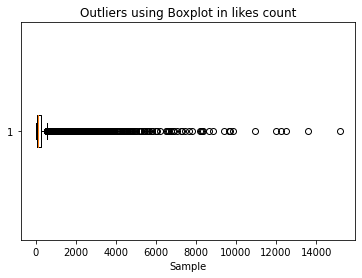

In [38]:
# Deteksi dengan boxplot
plt.boxplot(list(df_numeric.likes_count), vert=False)
plt.title("Outliers using Boxplot in likes count")
plt.xlabel('Sample')

In [39]:
def detect_outliers_iqr(data): #This funtion used to be detect outlier with interquartile range(iqr)
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


In [40]:
# Detect Outlier with IQR in likes count
monthly_outliers_likes = detect_outliers_iqr(list(df_numeric.likes_count))
print("Outliers from IQR method: ", monthly_outliers_likes)

Outliers from IQR method:  [560, 560, 560, 561, 561, 561, 562, 563, 565, 565, 566, 566, 566, 567, 567, 567, 567, 567, 568, 568, 568, 568, 569, 569, 569, 570, 570, 570, 571, 571, 571, 572, 572, 572, 573, 573, 573, 573, 573, 574, 574, 574, 574, 574, 574, 574, 575, 575, 575, 575, 576, 576, 577, 577, 577, 578, 578, 579, 579, 579, 579, 580, 580, 580, 580, 580, 580, 581, 581, 582, 583, 583, 584, 584, 584, 585, 587, 587, 587, 588, 588, 588, 589, 589, 589, 589, 589, 590, 590, 590, 591, 592, 592, 594, 594, 594, 594, 595, 595, 596, 596, 596, 596, 596, 596, 596, 596, 597, 597, 597, 598, 598, 598, 599, 599, 599, 599, 599, 599, 600, 600, 600, 601, 601, 602, 602, 603, 603, 604, 604, 605, 605, 605, 605, 606, 606, 608, 608, 609, 609, 609, 610, 610, 610, 610, 610, 611, 611, 612, 612, 612, 613, 613, 613, 613, 614, 614, 615, 615, 615, 615, 616, 617, 618, 618, 619, 619, 619, 619, 620, 620, 620, 622, 622, 622, 622, 622, 622, 622, 622, 623, 623, 624, 624, 625, 625, 625, 626, 626, 627, 627, 628, 629, 629, 62

In [41]:
# Replace with Median
e = []
for y in list(df_numeric.likes_count): # This loop tu append value column likes count into e list 
    ff = y in monthly_outliers_likes
    if ff is True:
        y=statistics.median(list(df_numeric.likes_count))
    else:
        y=y
    e.append(y)

In [42]:
# Before, after (handling outlier) = mean and median data
print("Mean data : ",statistics.mean(list(df_numeric.likes_count)))
print("Median data : ",statistics.median(list(df_numeric.likes_count)))
print("Mean after replacing with value median : ",statistics.mean(e))
print("Median after replacing with value median: ",statistics.median(e))

Mean data :  279.41360523038605
Median data :  103.0
Mean after replacing with value median :  126.9891811955168
Median after replacing with value median:  103.0


In [43]:
# Deleting
tr = []
for j in list(df_numeric.likes_count):
    f = j in monthly_outliers_likes
    if f is False:
        tr.append(j)

In [44]:
print("The amount of data before it is resolved outliers: ",len(list(df_new.likes_count)))
print("Amount of data after outliers are resolved: ",len(tr))

The amount of data before it is resolved outliers:  12848
Amount of data after outliers are resolved:  11492


In [45]:
# Value mean and median data before after deleting
print("Mean data : ",statistics.mean(list(df_numeric.likes_count)))
print("Median data : ",statistics.median(list(df_numeric.likes_count)))
print("Mean data after deleting data outliers: ",statistics.mean(tr))
print("Median data after deleting data outliers: ",statistics.median(tr))

Mean data :  279.41360523038605
Median data :  103.0
Mean data after deleting data outliers:  129.81978767838496
Median data after deleting data outliers:  87.0


Whether deleting method or changing the median value in case likes count, the value after being overcome has a fairly large gap. So, back to the point at the beginning, I decided to stick with df_new (no handling outliers) which I will export to csv for EDA needs. This is because of the fear of value missing, that i expressed at the beginning

### Export Data to CSV

First of all, I'll check what I've been working on above 

In [46]:
df_new.info() #Check Datatypes and Null 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12848 entries, 0 to 14622
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12848 non-null  object 
 1   item_ID           12848 non-null  object 
 2   product_name      12848 non-null  object 
 3   brand_name        12848 non-null  object 
 4   category_name     12848 non-null  object 
 5   subcategory_name  12848 non-null  object 
 6   current_price     12848 non-null  float64
 7   likes_count       12848 non-null  int64  
 8   is_new            12848 non-null  object 
 9   codCountry        12848 non-null  object 
 10  perc_discount     12848 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


In [47]:
df_new

,ID,item_ID,product_name,brand_name,category_name,subcategory_name,current_price,likes_count,is_new,codCountry,perc_discount
0,27788,4677,Mesure verticale horizontale de laser de nivea...,Loskii,house,ART MURAL,21.48,285,0,"ID,MY,PH,SG,TH,VN",42.0
1,42560,10372,Chemises élégantes de dentelle de patchwork,ZANZEA,women,Chemises,22.99,147,0,"ID,MY,PH,SG,TH,VN",65.0
2,45211,3658,Filtre à essence liquide universel pour essenc...,BEON,house,Lumières,1.59,1,0,"ID,MY,PH,SG,TH,VN",58.0
3,48169,1168,Rouleau de peau YFM pour les rides cicatrices ...,Y.F.M,beauty,Accessoires soin visage,19.03,500,0,"ID,MY,PH,SG,TH,VN",43.0
4,51841,9761,Sweat à capuche à manches longues à manches lo...,ZANZEA,women,T-Shirts,21.99,251,0,"ID,MY,PH,SG,TH,VN",0.0
...,...,...,...,...,...,...,...,...,...,...,...
14618,1723915,9143,Pantoufles d'intérieur à boucle en métal de co...,Socofy,shoes,Claquettes & Tongs,29.99,2,1,"ID,MY,PH,SG,TH,VN",55.0
14619,1723920,9154,Pantoufles de chaussures à rayures colorées,Socofy,shoes,Claquettes & Tongs,32.99,2,1,"ID,MY,PH,SG,TH,VN",53.0
14620,1723924,9155,Pantoufles de chaussures à rayures de couleur ...,Socofy,shoes,Claquettes & Tongs,32.99,1,1,"ID,MY,PH,SG,TH,VN",50.0
14621,1723927,9117,Chaussures plates larges brodées de fleurs,Lostisy,shoes,Derbies & Mocassins,29.99,2,1,"ID,MY,PH,SG,TH,VN",50.0


In [48]:
# Add new column for count value in codCountry by split the string with comma 
df_new['count_country'] = df_new['codCountry'].apply(lambda x: len(x.split(",")))
df_new

,ID,item_ID,product_name,brand_name,category_name,subcategory_name,current_price,likes_count,is_new,codCountry,perc_discount,count_country
0,27788,4677,Mesure verticale horizontale de laser de nivea...,Loskii,house,ART MURAL,21.48,285,0,"ID,MY,PH,SG,TH,VN",42.0,6
1,42560,10372,Chemises élégantes de dentelle de patchwork,ZANZEA,women,Chemises,22.99,147,0,"ID,MY,PH,SG,TH,VN",65.0,6
2,45211,3658,Filtre à essence liquide universel pour essenc...,BEON,house,Lumières,1.59,1,0,"ID,MY,PH,SG,TH,VN",58.0,6
3,48169,1168,Rouleau de peau YFM pour les rides cicatrices ...,Y.F.M,beauty,Accessoires soin visage,19.03,500,0,"ID,MY,PH,SG,TH,VN",43.0,6
4,51841,9761,Sweat à capuche à manches longues à manches lo...,ZANZEA,women,T-Shirts,21.99,251,0,"ID,MY,PH,SG,TH,VN",0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
14618,1723915,9143,Pantoufles d'intérieur à boucle en métal de co...,Socofy,shoes,Claquettes & Tongs,29.99,2,1,"ID,MY,PH,SG,TH,VN",55.0,6
14619,1723920,9154,Pantoufles de chaussures à rayures colorées,Socofy,shoes,Claquettes & Tongs,32.99,2,1,"ID,MY,PH,SG,TH,VN",53.0,6
14620,1723924,9155,Pantoufles de chaussures à rayures de couleur ...,Socofy,shoes,Claquettes & Tongs,32.99,1,1,"ID,MY,PH,SG,TH,VN",50.0,6
14621,1723927,9117,Chaussures plates larges brodées de fleurs,Lostisy,shoes,Derbies & Mocassins,29.99,2,1,"ID,MY,PH,SG,TH,VN",50.0,6


In [49]:
# Make CSV with name product_rating_clean.csv
df_new.to_csv(path_data + "product_rating_clean.csv")

## 7. Exploratory Data Analysis & Visualization

In [50]:
# chehck null
df_new.isnull().sum()

ID                  0
item_ID             0
product_name        0
brand_name          0
category_name       0
subcategory_name    0
current_price       0
likes_count         0
is_new              0
codCountry          0
perc_discount       0
count_country       0
dtype: int64

In [51]:
# Check Duplicate again
df_new[df_new.duplicated(keep=False)]

,ID,item_ID,product_name,brand_name,category_name,subcategory_name,current_price,likes_count,is_new,codCountry,perc_discount,count_country


In [52]:
# Check data types
df_new.dtypes

ID                   object
item_ID              object
product_name         object
brand_name           object
category_name        object
subcategory_name     object
current_price       float64
likes_count           int64
is_new               object
codCountry           object
perc_discount       float64
count_country         int64
dtype: object

**Correlation**

In [53]:
df_check_corr = df_new[['current_price', 'likes_count', 'perc_discount','count_country','is_new']]

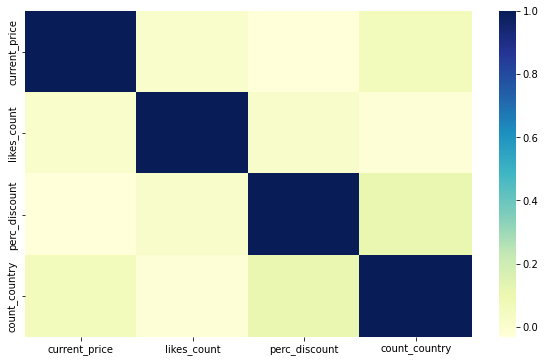

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df_check_corr.corr(), cmap="YlGnBu")

In [55]:
from pandas import factorize

labels, categories = factorize(df_new["is_new"])
df_new["labels"] = labels
abs(df_new["likes_count"].corr(df_new["labels"]))

0.0884916613931928

In [56]:
from pandas import factorize

labels, categories = factorize(df_new["is_new"])
df_new["labels"] = labels
abs(df_new["perc_discount"].corr(df_new["labels"]))

0.0008516322279995744

In [57]:
from pandas import factorize

labels, categories = factorize(df_new["is_new"])
df_new["labels"] = labels
abs(df_new["current_price"].corr(df_new["labels"]))

0.0029339526518369218

Whether it's checked by label or not, columns containing numeric values don't have a high correlation. Between calculated columns, resulting in a correlation below 50%

In [58]:
# Group by item status to count item
df_group_item = df_new.groupby('is_new')['item_ID'].count().reset_index()

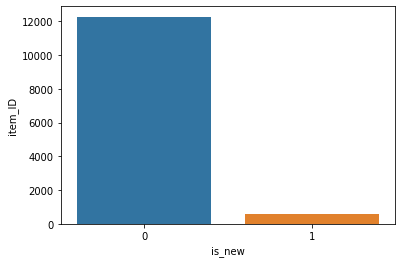

In [59]:
sns.barplot(x="is_new", y="item_ID", data=df_group_item)
plt.show()

Based on the total of all categories, more than 90% of the items available on the site are old items.

In total, the items on NewChic.com are 12,848 items

**the proportion of items by category**

In [60]:
y=df_new['category_name'].value_counts().reset_index()

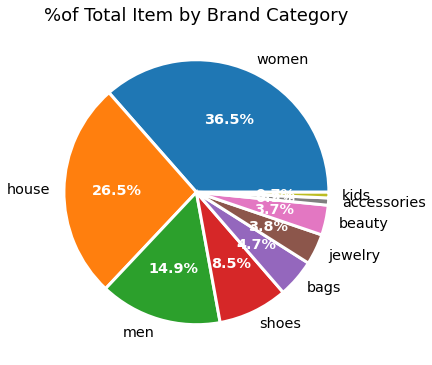

In [61]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    y['category_name'], labels=y['index'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('%of Total Item by Brand Category', fontsize=18)
plt.tight_layout()

Female category occupies the first position of the number of items on the site

In [62]:
fig = px.box(df_new, x="category_name", y="current_price", color="category_name")
fig.show()

In [63]:
fig = px.box(df_new, x="category_name", y="perc_discount", color="category_name")
fig.show()

**Get it high price in each category(product_name, brand_name, and category_name)**

In [64]:
df_price = df_new[['product_name','brand_name','category_name','current_price' ]]

In [65]:
price_highest = df_price.loc[df_price.groupby('brand_name')['current_price'].nlargest(5).index.get_level_values(1)]
price_highest

,product_name,brand_name,category_name,current_price
3589,Sac de poitrine patchwork multifonctionnel imp...,AH ARCTIC HUNTER,bags,33.99
5356,Vestes lavées multi-poches pour hommes,Blioesy,men,64.04
6764,Bottes à fermeture à glissière en métal de gra...,Blioesy,shoes,63.71
5022,Portefeuille à 3 volets gaufré vintage pour ho...,Blioesy,bags,55.99
5773,Manteau chaud épaississant coupe-vent pour homme,Blioesy,men,54.99
...,...,...,...,...
2128,Cardigans d'affaires décontractés 100% laine,yanyuanlong,men,73.99
2132,Chemise de golf respirante et confortable en t...,yanyuanlong,men,70.34
2119,yanyuanlong manteau long mi épaississant,yanyuanlong,men,57.59
2344,Pull 100% laine jacquard mode,yanyuanlong,men,44.62


In [66]:
fig = px.bar(price_highest, x="category_name", y="current_price", color="brand_name", text="brand_name", title='Highest price of the brand')
fig.show()

The 5 highest price samples taken in each category, there is a gap in the beauty, home, and jewelry categories

**Finding the most of likes from each brand based on categories and sub categories**

In [67]:
# Grouping brand_name and categpry_name
total_likes_brand = df_new.groupby(by=["brand_name", "category_name", "subcategory_name"], dropna=False).sum()[['likes_count']]
total_likes_brand = total_likes_brand.reset_index()
total_likes_brand

#Rename column
total_likes_brand.rename(columns = {'likes_count': 'total_likes'}, inplace = True)

In [68]:
total_likes_brand= total_likes_brand[total_likes_brand['total_likes']!=0] #resolve the error message cannot be normalized 'weight sum to zero'

fig = px.treemap(total_likes_brand, path=[px.Constant('brand_name'),'brand_name', 'category_name', 'subcategory_name'],
                 values='total_likes',
                 color= 'total_likes',title='Number of likes on The Brand Name in Each Category')

fig.show()

**Note**: For the number of brand_name and categories, the **details** can be **seen only by the size**, but the subcategories_name can be seen from the size and color. I've tried my best to make it consistent in multi-level cases like this, but unfortunately haven't found a solution

## 8. Recommendations

1.   Based on the company's total likes, the female category deserves more space on the page (without ruling out other categories as well)

2.   Since there is no significant correlation between numerical variables, next step, companies can pay attention to color combinations, designs, etc., which are consumer preferences

3.   It seems that the business domain on the NewChicc site is men's and women's fashion (teenagers to adults), this can be seen from the total stock of goods. However, the average discount given is actually the highest for children, even though the proportion stock item is the smallest. Therefore, it is necessary to reconsider the provision of the discount although further investigation is needed regarding the income generated from the discount (again, unfortunately the dataset does not provide this information).



## 9. Result - Create the story

1.   The categories of women, houses, and men, respectively, constitute the largest proportion of items on the site. However, the average discount given by the three does not produce the same result as in the largest proportion of items. The category of children is the one who ranks first on the average discount and for the largest proportion of items, it takes the last position

2.   The results obtained in number 1 are increasingly convincing that there is no correlation between numeric variables.

3. The top three number of likes from the category, two of which are from women:
  -  ZANZEA : Women
  -  O-NEWE : Women
  -  ChArmkpR : Men

4.   Maybe it can be concluded that female customers visit our site more (unfortunately the dataset does not provide customer profiles, so further analysis is needed)

5. The highest price comes from a beauty and the brand name is Fiido